In [ ]:
### NAME: Akshitha Karthick Kumar
### DATE: 5/6/2021


### Data Visualization of Score Card using Python

In [8]:
import csv
import pandas as pd

def get_data():
    '''Retrieve data from the csv file'''
    try:
        # INITILIZATION
        FILE_PATH = '/users/cis5357/Exams/'
        
        #INPUT
        exam_df = pd.read_csv(FILE_PATH + 'Exam3.csv', encoding='utf-8')
        exam_df['Semester'] = exam_df['Semester'].astype('object')
        exam_df['A'] = exam_df['A'].astype('int')
        exam_df['B'] = exam_df['B'].astype('int')
        exam_df['C'] = exam_df['C'].astype('int')
    
    except FileNotFoundError as fne:
        print(f'\nThe data file not found due to either incorrect path or filename\n')
        print(str(fne))
        print(f"\nThe program will now terminate.")
    
    except ValueError as ve:
        print(f"\nA non-numeric value was read in. All rows with non-numeric values will be dropped from the dataframe")
        print("The resulting dataframe is:\n")
        exam_df = exam_df[pd.to_numeric(exam_df['A'], errors = 'coerce').notnull()]
        exam_df = exam_df[pd.to_numeric(exam_df['B'], errors = 'coerce').notnull()]
        exam_df = exam_df[pd.to_numeric(exam_df['C'], errors = 'coerce').notnull()]
        exam_df['Semester'] = exam_df['Semester'].astype('object')
        exam_df['A'] = exam_df['A'].astype('int')
        exam_df['B'] = exam_df['B'].astype('int')
        exam_df['C'] = exam_df['C'].astype('int')
        return exam_df
    
    else:
        return exam_df

In [9]:
def print_b_grade_stats(grade_b_series):
    '''Print console output'''
    
    # OUTPUT
    grade_b_count = len(grade_b_series)
    grade_b_average = grade_b_series.mean()
    grade_b_median = grade_b_series.median()
    grade_b_min = grade_b_series.min()
    grade_b_max = grade_b_series.max()
    print("The Summary Stats for assigned letter grade B\n")
    print(f"The total number of B's Assigned:\t{format(grade_b_count, '>1')}")
    print(f"The average number of B's Assigned:\t{format(grade_b_average, '>1')}")
    print(f"The median number of B's Assigned:\t{format(grade_b_median, '1.2f')}")
    print(f"The highest number of B's Assigned:\t{format(grade_b_max, '>1')}")
    print(f"The lowest number of B's Assigned:\t{format(grade_b_min, '>2')}\n")

In [10]:
import pandas as pd

def grade_b_stats(exam_df):
    '''B grade stats'''
    
    # PROCESS
    grade_b_series = exam_df['B']
    pd.set_option('precision', 2)
    print_b_grade_stats(grade_b_series)

In [11]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import numpy as np

def draw_graphs(grade_a_df, grade_b_df):
    '''Plotting Graphs side-by-side'''
    
    # OUTPUT
    plt.close('all')
    fig1 = plt.figure(figsize=(30,30), dpi=120)
    fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(60,25))
    fig1.suptitle('\nNumber of Letter Grades Assigned over time\n', fontsize = 50)
    ax1.grid(True)
    ax1.set_title('Number of Letter Grade A over time', fontsize=40)
    ax1.set_xlabel('Semester', fontsize=35)
    ax1.set_ylabel('''# of A's''', fontsize=35)
    ax1.plot(grade_a_df['Semester'], grade_a_df['A'], c='red', marker='o')
    ax1.set_ylim(0,20)
    ax1.tick_params(axis='x', labelsize=28)
    ax1.tick_params(axis='y', labelsize=28)
    
    ax2.grid(True)
    ax2.set_title('Number of Letter Grade B over time', fontsize=40)
    ax2.set_xlabel('Semester', fontsize=35)
    ax2.set_ylabel('''# of B's''', fontsize=35)
    ax2.set_ylim(0,16)
    ax2.tick_params(axis='x', labelsize=28)
    ax2.tick_params(axis='y', labelsize=28)
    ax2.plot(grade_b_df['Semester'],grade_b_df['B'], c='blue', marker='o')
    fig1.tight_layout()
    fig1.tight_layout(pad=3)

In [12]:
def plot_grades(exam_df):
    '''Plotting grades for A and B letter grades'''
    
    # PROCESS
    grade_a_df = exam_df[['Semester', 'A']]
    
    grade_b_df = exam_df[['Semester', 'B']]
    
    draw_graphs(grade_a_df, grade_b_df)

In [13]:
def main():
    '''Main function to call other functions'''
    try:
        # INNPUT
        exam_df = get_data()
        
        # PROCESS & OUTPUT
        grade_b_stats(exam_df)
        print("\n")
        
        # PROCESS & OUTPUT
        plot_grades(exam_df)
        
    except Exception as ex:
        print("Program terminated unsuccessfully")

The Summary Stats for assigned letter grade B

The total number of B's Assigned:	20
The average number of B's Assigned:	10.25
The median number of B's Assigned:	10.50
The highest number of B's Assigned:	15
The lowest number of B's Assigned:	 6





<Figure size 3600x3600 with 0 Axes>

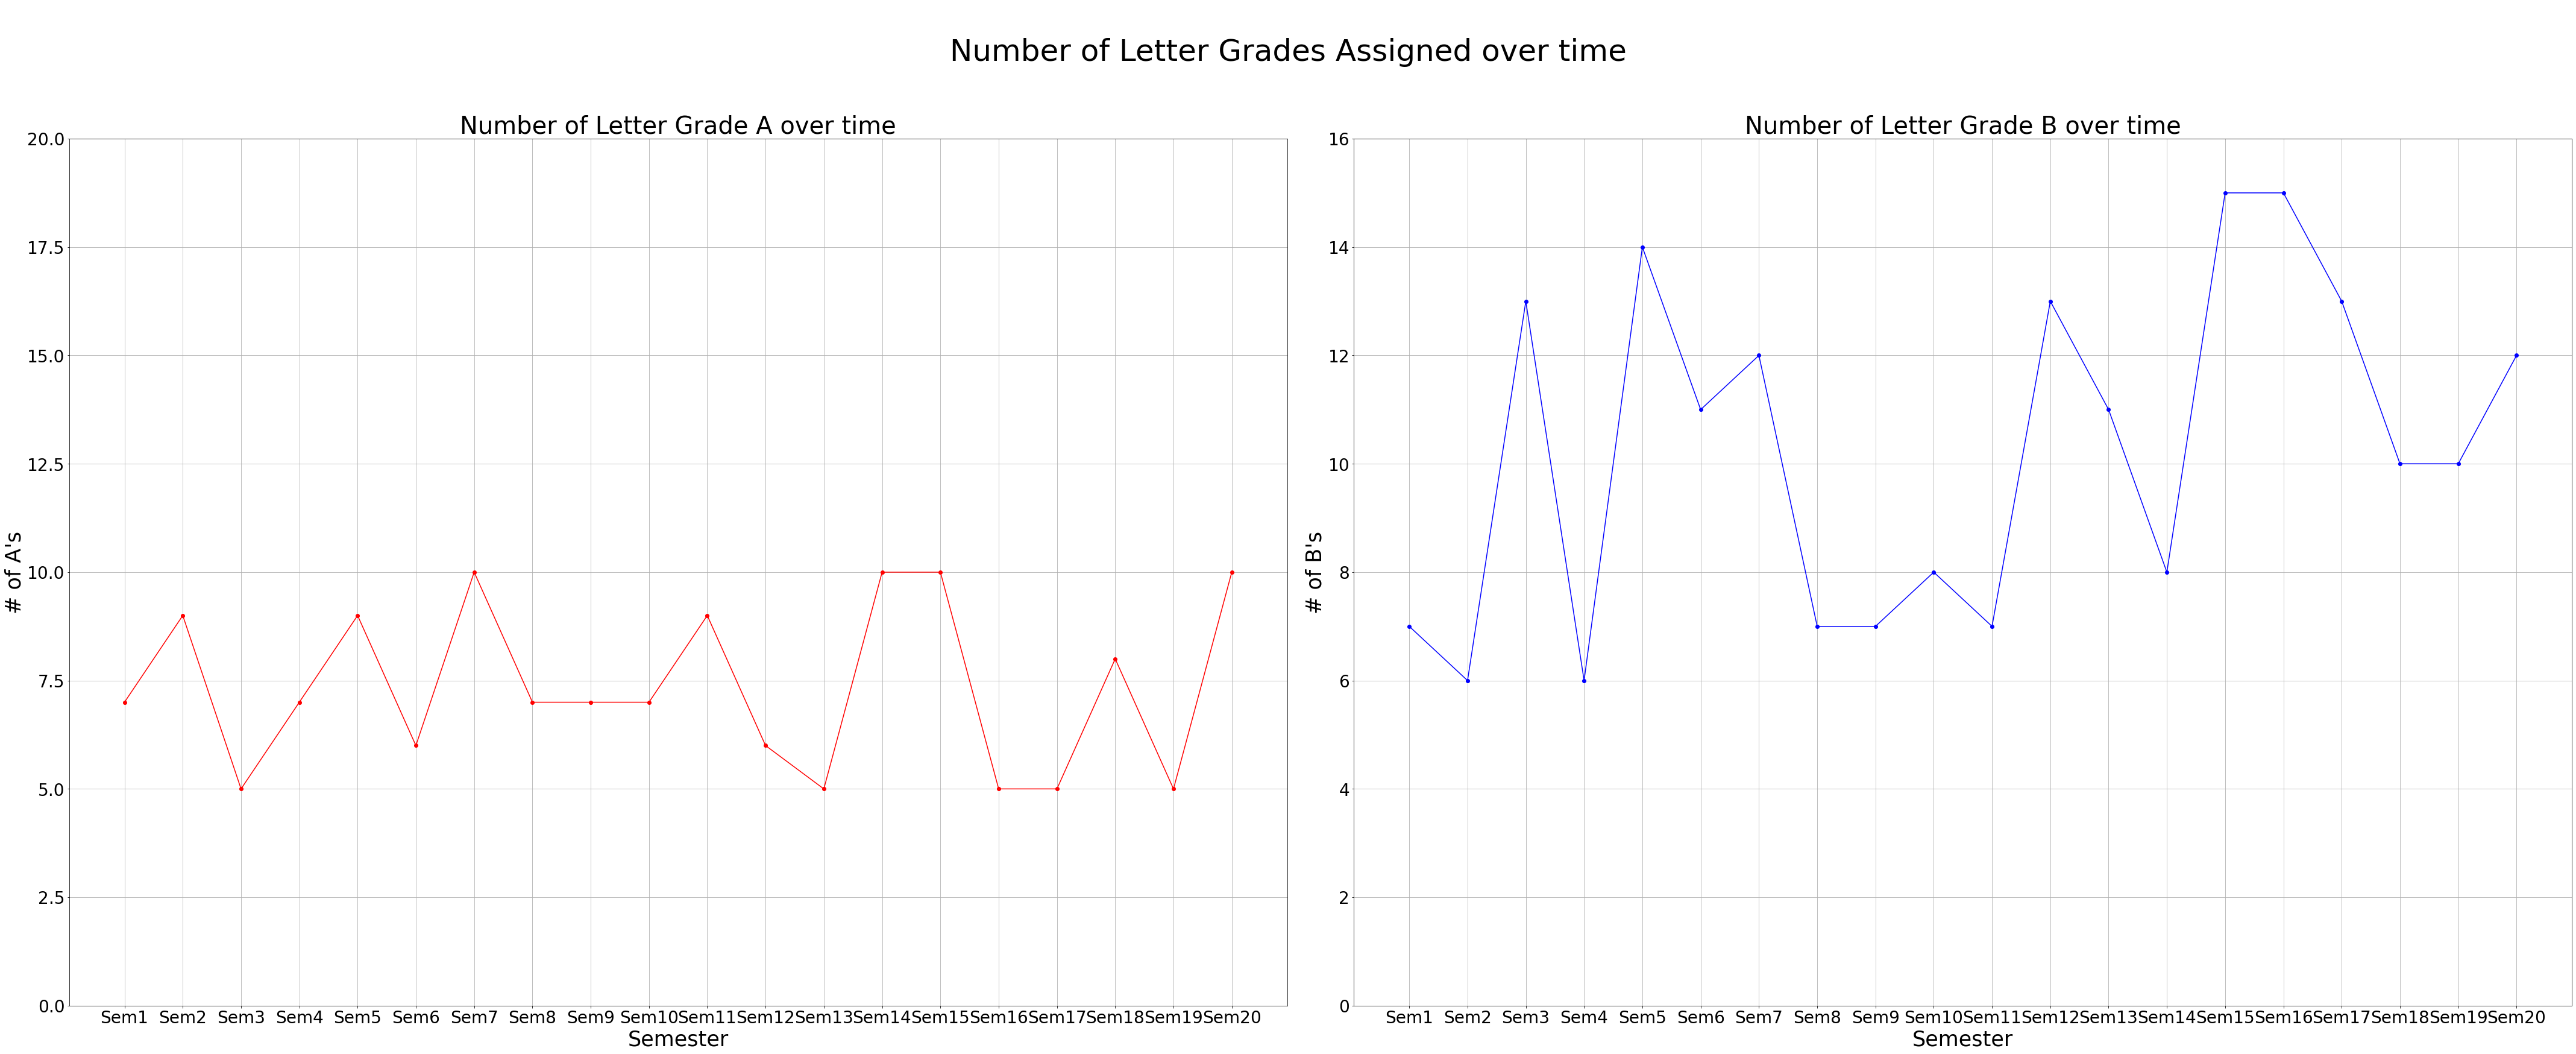

In [14]:
#Calling main fucntion
main()